In [1]:
import gillespy2 as gp2
import stochss_compute as sssc

In [2]:
import sys
sys.path.insert(1, '../test/unit_tests/')
import gillespy2_models as models

In [3]:
import multiprocessing as mp

In [4]:
from distributed import Client

In [5]:
dask = Client()

2023-02-19 10:45:45,179 - distributed.http.proxy - INFO - To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
2023-02-19 10:45:45,201 - distributed.scheduler - INFO - State start
2023-02-19 10:45:45,205 - distributed.scheduler - INFO -   Scheduler at:     tcp://127.0.0.1:36571
2023-02-19 10:45:45,206 - distributed.scheduler - INFO -   dashboard at:            127.0.0.1:8787
2023-02-19 10:45:45,221 - distributed.nanny - INFO -         Start Nanny at: 'tcp://127.0.0.1:41653'
2023-02-19 10:45:45,224 - distributed.nanny - INFO -         Start Nanny at: 'tcp://127.0.0.1:39879'
2023-02-19 10:45:45,227 - distributed.nanny - INFO -         Start Nanny at: 'tcp://127.0.0.1:38065'
2023-02-19 10:45:45,230 - distributed.nanny - INFO -         Start Nanny at: 'tcp://127.0.0.1:38509'
2023-02-19 10:45:45,598 - distributed.scheduler - INFO - Register worker <WorkerState 'tcp://127.0.0.1:46185', name: 1, status: init, memory: 0, pro

In [6]:
port = dask.scheduler.addr.split(':')[2]
port

'36571'

In [7]:
import asyncio

In [8]:
async def _sssc():
    kwargs = {
        'dask_scheduler_port': port
    }
    await sssc.start_api(**kwargs)

In [9]:
process = mp.Process(target=asyncio.run, args=(_sssc(),))

In [10]:
process.start()

/home/mdip/.python/cpython/Lib/multiprocessing/process.py:125: RuntimeWarning: coroutine '_sssc' was never awaited
  del self._target, self._args, self._kwargs


/home/mdip/projects/StochSS-Compute/env/lib/python3.11/site-packages/scipy/integrate/_ode.py:1348: UserWarning: lsoda: Excess work done on this call (perhaps wrong Dfun type).
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,
/home/mdip/projects/StochSS-Compute/env/lib/python3.11/site-packages/scipy/integrate/_ode.py:1348: UserWarning: lsoda: Repeated convergence failures (perhaps bad Jacobian or tolerances).
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,
/home/mdip/projects/StochSS-Compute/env/lib/python3.11/site-packages/scipy/integrate/_ode.py:1348: UserWarning: lsoda: Repeated error test failures (internal error).
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,


 lsoda--  at t (=r1) and step size h (=r2), the      
       corrector convergence failed repeatedly       
       or with abs(h) = hmin    l
      in above,  r1 =  0.1655726478526D+03   r2 =  0.7818047079655D-09
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1655726478526D+03   r2 =  0.6125752920979D-17
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1655726478526D+03   r2 =  0.6125752920979D-17
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1655726478526D+03   r2 =  0.6125752920979D-17
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       suc

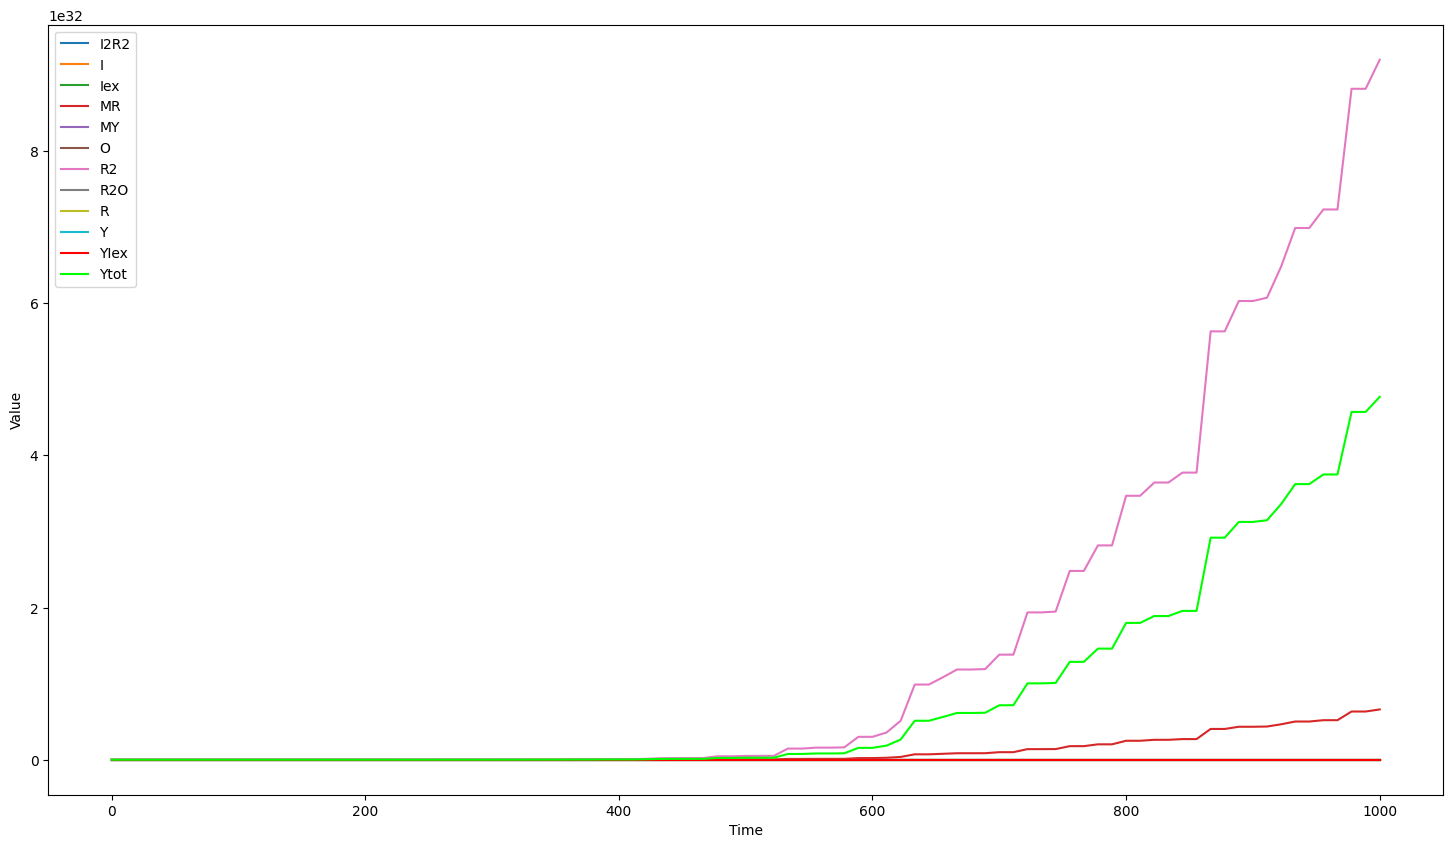

In [23]:
models.create_lac_operon().run(solver = gp2.ODESolver, t=1000).plot()

In [11]:
sim = sssc.RemoteSimulation(models.create_lac_operon(), host='localhost', solver=gp2.TauHybridSolver)

StochSS-Compute listening on: :29681
Cache directory: /home/mdip/projects/StochSS-Compute/examples/cache
Connecting to Dask scheduler at: localhost:36571

2023-02-19 10:45:46.220559 | <127.0.0.1> | Simulation Run Request | <5346d8c8e78489743ecd41b87bfc36f6> | Results not cached. Running simulation.
2023-02-19 10:45:46.404732 | <127.0.0.1> |               Status Request | <5346d8c8e78489743ecd41b87bfc36f6> | Trajectories: 1 |               Task ID: 5346d8c8e78489743ecd41b87bfc36f6:1:097c45b4cbe07edb
2023-02-19 10:45:46.406364 | <5346d8c8e78489743ecd41b87bfc36f6> | <5346d8c8e78489743ecd41b87bfc36f6:1:097c45b4cbe07edb> |Status: RUNNING | Task: processing | error: None
2023-02-19 10:47:06.289698 | <127.0.0.1> |               Status Request | <5346d8c8e78489743ecd41b87bfc36f6> | Trajectories: 1 |               Task ID: 5346d8c8e78489743ecd41b87bfc36f6:1:097c45b4cbe07edb
2023-02-19 10:47:06.298664 | <5346d8c8e78489743ecd41b87bfc36f6> | <5346d8c8e78489743ecd41b87bfc36f6:1:097c45b4cbe07edb> |S

In [12]:
results = sim.run()

2023-02-19 10:45:46,228 - distributed.scheduler - INFO - Receive client connection: Client-79a5fa3e-b06c-11ed-bb0d-d7d19d105abb
2023-02-19 10:45:46,229 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:37666


[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run


In [18]:
results.sim_status

2023-02-19 10:47:37,659 - distributed.scheduler - INFO - Receive client connection: Client-bc10f198-b06c-11ed-bb0d-d7d19d105abb
2023-02-19 10:47:37,660 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:50442
2023-02-19 10:47:37,662 - distributed.worker - INFO - Run out-of-band function 'scheduler_task_state'
2023-02-19 10:47:37,672 - distributed.scheduler - INFO - Remove client Client-bc10f198-b06c-11ed-bb0d-d7d19d105abb
2023-02-19 10:47:37,673 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:50442; closing.
2023-02-19 10:47:37,674 - distributed.scheduler - INFO - Remove client Client-bc10f198-b06c-11ed-bb0d-d7d19d105abb
2023-02-19 10:47:37,674 - distributed.scheduler - INFO - Close client connection: Client-bc10f198-b06c-11ed-bb0d-d7d19d105abb


'RUNNING'

2023-02-19 10:47:47,002 - distributed.core - INFO - Event loop was unresponsive in Worker for 20.96s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
2023-02-19 10:48:13,657 - distributed.core - INFO - Event loop was unresponsive in Worker for 24.99s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
2023-02-19 10:48:31,226 - distributed.core - INFO - Event loop was unresponsive in Worker for 17.57s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
2023-02-19 10:48:45,364 - distributed.core - INFO - Event loop was unresponsive in Worker for 14.14s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
2023-02-19 10:48:49,452 - distributed.core - INFO - Event lo

In [19]:
process.terminate()

2023-02-19 10:49:33,828 - distributed.core - INFO - Connection to tcp://127.0.0.1:37666 has been closed.
2023-02-19 10:49:33,829 - distributed.scheduler - INFO - Remove client Client-79a5fa3e-b06c-11ed-bb0d-d7d19d105abb
2023-02-19 10:49:33,830 - distributed.scheduler - INFO - Close client connection: Client-79a5fa3e-b06c-11ed-bb0d-d7d19d105abb
2023-02-19 10:49:34,059 - distributed.core - INFO - Event loop was unresponsive in Worker for 6.18s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.


In [20]:
dask.close()

2023-02-19 10:49:40,722 - distributed.nanny - INFO - Closing Nanny at 'tcp://127.0.0.1:41653'. Reason: nanny-close
2023-02-19 10:49:40,723 - distributed.nanny - INFO - Nanny asking worker to close. Reason: nanny-close
2023-02-19 10:49:40,725 - distributed.nanny - INFO - Closing Nanny at 'tcp://127.0.0.1:39879'. Reason: nanny-close
2023-02-19 10:49:40,726 - distributed.nanny - INFO - Nanny asking worker to close. Reason: nanny-close
2023-02-19 10:49:40,727 - distributed.nanny - INFO - Closing Nanny at 'tcp://127.0.0.1:38065'. Reason: nanny-close
2023-02-19 10:49:40,728 - distributed.nanny - INFO - Nanny asking worker to close. Reason: nanny-close
2023-02-19 10:49:40,728 - distributed.nanny - INFO - Closing Nanny at 'tcp://127.0.0.1:38509'. Reason: nanny-close
2023-02-19 10:49:40,729 - distributed.nanny - INFO - Nanny asking worker to close. Reason: nanny-close
2023-02-19 10:49:40,732 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:37618; closing.
2023-02-19 10:4

In [ ]:
model = gp2.Model()
gp2.import_SBML('PW000142.sbml', gillespy_model=model)